In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  StandardScaler
%matplotlib inline

In [10]:
df=pd.read_csv('updated_data.csv')
df.head()

,Number of blast,Hole Diameter,Hole Depth,Burden to Spacing Ratio,Stemming,Max Charge Per Delay,Powder Factor,Flyrock Distance
0,1,75,10.0,0.40,1.8,47.712928,0.50,75.0
1,2,75,10.0,0.40,1.8,47.712928,0.60,80.0
2,3,75,10.0,0.44,2.0,47.712928,0.55,84.0
3,4,75,11.0,0.42,2.0,53.014365,0.50,90.0
4,5,75,11.0,0.42,1.4,53.014365,0.45,67.0


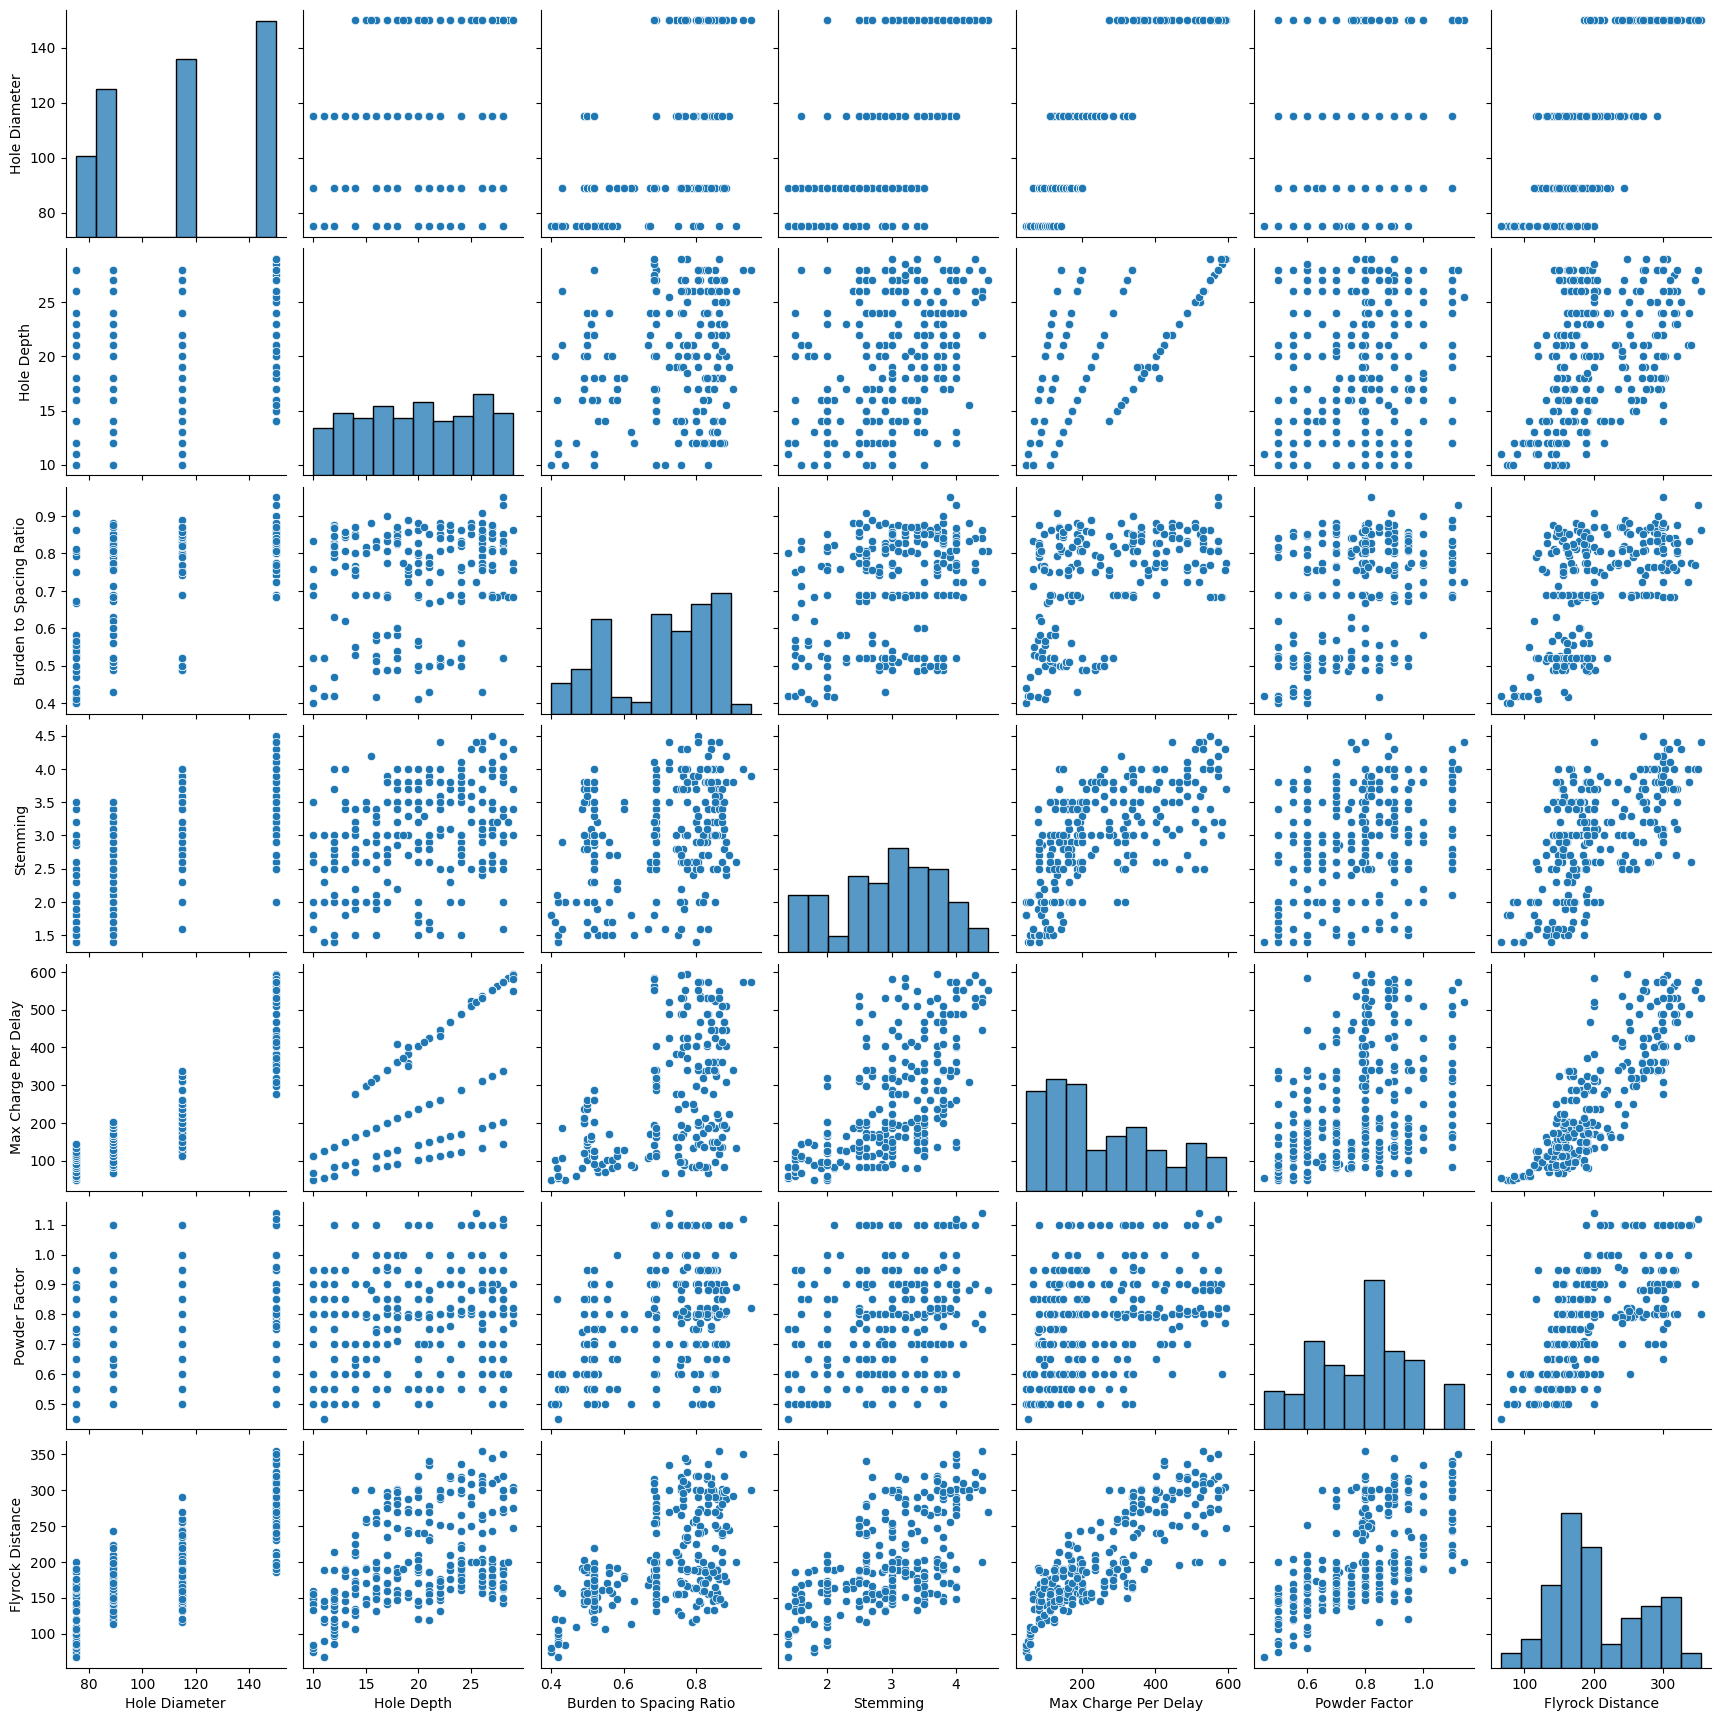

In [21]:
import seaborn as sns
sns.pairplot(df)

In [22]:
df.corr()

,Hole Diameter,Hole Depth,Burden to Spacing Ratio,Stemming,Max Charge Per Delay,Powder Factor,Flyrock Distance
Hole Diameter,1.000000,0.183492,0.530164,0.624078,0.868781,0.384531,0.790382
Hole Depth,0.183492,1.000000,0.187772,0.398738,0.592194,0.179633,0.443531
Burden to Spacing Ratio,0.530164,0.187772,1.000000,0.388833,0.489359,0.373170,0.563910
Stemming,0.624078,0.398738,0.388833,1.000000,0.650006,0.331326,0.590885
Max Charge Per Delay,0.868781,0.592194,0.489359,0.650006,1.000000,0.361690,0.838648
Powder Factor,0.384531,0.179633,0.373170,0.331326,0.361690,1.000000,0.601277
Flyrock Distance,0.790382,0.443531,0.563910,0.590885,0.838648,0.601277,1.000000


In [23]:
X = df[['Hole Diameter', 'Hole Depth', 'Burden to Spacing Ratio', 'Stemming', 'Max Charge Per Delay', 'Powder Factor']]
y= df[['Flyrock Distance']]

In [25]:
X.head()

,Hole Diameter,Hole Depth,Burden to Spacing Ratio,Stemming,Max Charge Per Delay,Powder Factor
0,75,10.0,0.40,1.8,47.712928,0.50
1,75,10.0,0.40,1.8,47.712928,0.60
2,75,10.0,0.44,2.0,47.712928,0.55
3,75,11.0,0.42,2.0,53.014365,0.50
4,75,11.0,0.42,1.4,53.014365,0.45


In [26]:
y.head()

,Flyrock Distance
0,75.0
1,80.0
2,84.0
3,90.0
4,67.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.fit_transform (X_test)

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [42]:
regression.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.model_selection import cross_val_score

validation_scores= cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv= 100 )


In [52]:
np.mean(validation_scores)

-849.8926333327452

In [53]:
y_pred=regression.predict(X_test)

In [58]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mse)
score = r2_score(y_test, y_pred)
print (1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) ) #adjusted
print(score)
print(mse)
print(mae)
print(rmse)


0.8293967751633139
0.8451447651482388
644.675728280531
19.56829116519161
25.390465302560546


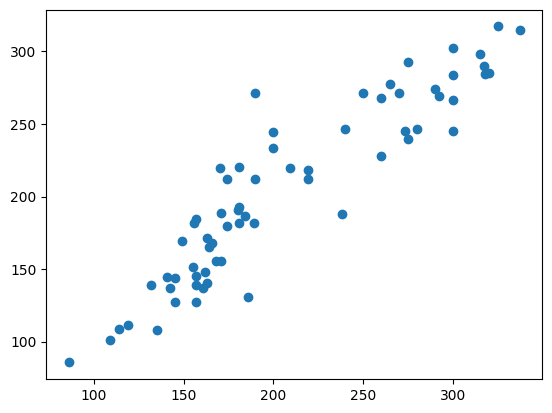

In [60]:
plt.scatter(y_test,y_pred)

In [62]:
residuals = y_test-y_pred
print(residuals)

     Flyrock Distance
248         55.138770
215        -17.860482
194         33.695798
168        -10.438471
66          17.949577
..                ...
196         -6.504988
228         16.503646
82          -0.673627
184         33.791509
38          -3.776745

[66 rows x 1 columns]


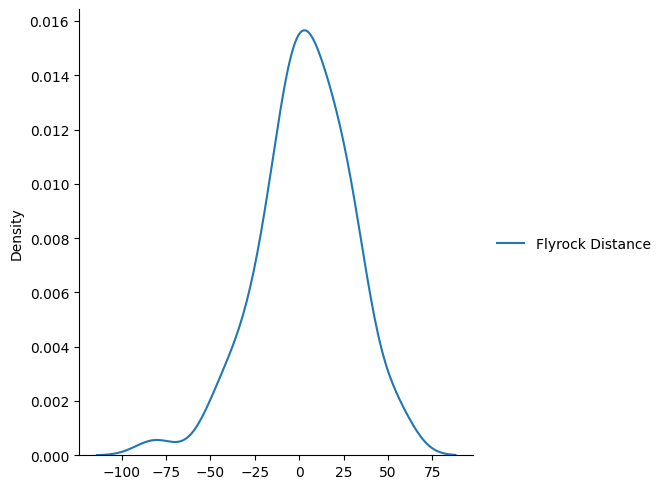

In [63]:
sns.displot(residuals,kind='kde')

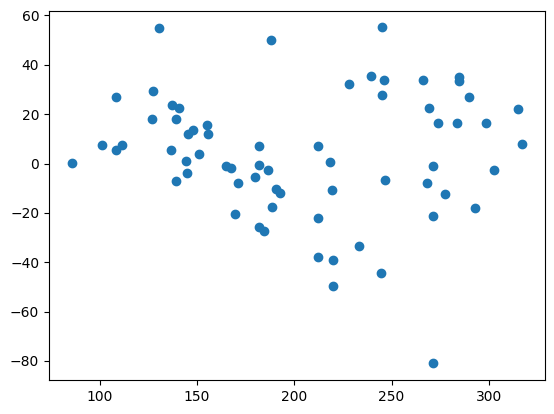

In [64]:
plt.scatter(y_pred,residuals)

In [70]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Flyrock Distance   R-squared (uncentered):                   0.073
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              2.482
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                      0.0246
Time:                        15:50:36   Log-Likelihood:                         -1322.0
No. Observations:                 196   AIC:                                      2656.
Df Residuals:                     190   BIC:                                      2676.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.5001     56.063      0.259      0.796     -96.085     125.085
x2             5.5694     35.050      0.159      0.874     -63.567      74.706
x3             6.8565     18.126      0.378      0.706     -28.897      42.610
x4            -0.0317     20.737     -0.002      0.999     -40.936      40.873
x5            27.7367     65.394      0.424      0.672    -101.256     156.729
x6            19.6136     16.437      1.193      0.234     -12.809      52.036
==============================================================================
Omnibus:                       18.595   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.190
Skew:                          -0.589   Prob(JB):                     2.06e-06
Kurtosis:                       4.349   Cond. No.                         10.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
print(regression.coef_)

[[14.50007359  5.56943404  6.85648662 -0.03169553 27.73666317 19.61356178]]
